## Previsão de Sobrevivência no Titanic

1. Pré-processamento de Dados

Importando as bibliotecas essenciais e carregando os conjuntos de treino e teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
train_df = pd.read_csv('train.csv')  # Dados de treino
test_df = pd.read_csv('test.csv')    # Dados de teste (sem a coluna target)

# Juntar os dados para pré-processamento consistente
df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

# Visualizar as primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.2 Análise exploratória inicial

Esta análise nos mostra:

O dataset tem 1309 entradas e 12 colunas

'Age' tem 263 valores nulos, 'Cabin' tem 1014, e 'Embarked' tem 2

A coluna 'Fare' tem um valor nulo nos dados de teste

Formato dos dados: (1309, 12)

Informações sobre colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None

Estatísticas descritivas:
        PassengerId    Survived       Pclass              Name   Sex  \
count   1309.000000  891.000000  1309.000000              1309  1309   
unique 

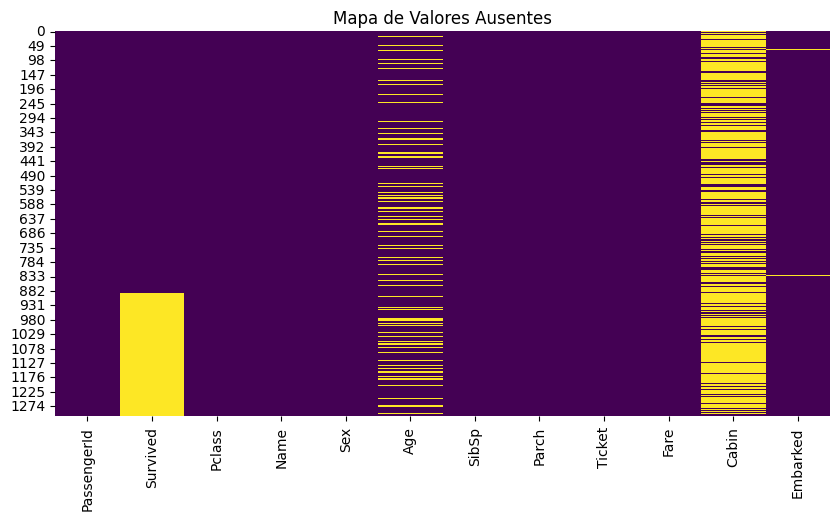

In [2]:
# Informações básicas
print("Formato dos dados:", df.shape)
print("\nInformações sobre colunas:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

# Valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Visualização de valores ausentes
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()

1.3 Preenchimento de valores nulos e transformação de variáveis categóricas

Preenchendo valores nulos (idade por sexo, fare por classe)

Criando uma nova feature 'Has_Cabin' para capturar a informação disponível

Label Encoding para variáveis binárias (Sex)

One-Hot para variáveis com >2 categorias (Embarked)

Pclass foi mantido como categoria ordinal


In [3]:
# Preencher Embarked (moda)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Tratamento de Cabin
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)

# Converter Sex para 0/1 (male=1, female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}).astype(int)

## preencher Age agrupando por Sex
age_median_by_sex = df.groupby('Sex')['Age'].median()
df['Age'] = df.apply(
    lambda row: age_median_by_sex[row['Sex']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

## Preencher Fare agrupando por Pclass
fare_median_by_pclass = df.groupby('Pclass')['Fare'].median().to_dict()
df['Fare'] = df.apply(
    lambda row: fare_median_by_pclass[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'],
    axis=1
)

## One-Hot Encoding para Embarked
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb')

#Label Encoding para Pclass
df['Pclass'] = df['Pclass'].astype('category').cat.codes

## Verificação final
print("\nValores ausentes após tratamento:")
print(df.isnull().sum())

print("\nPrimeiras linhas:")
print(df.head())


Valores ausentes após tratamento:
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Has_Cabin        0
Emb_C            0
Emb_Q            0
Emb_S            0
dtype: int64

Primeiras linhas:
   PassengerId  Survived  Pclass  \
0            1       0.0       2   
1            2       1.0       0   
2            3       1.0       2   
3            4       1.0       0   
4            5       0.0       2   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. Willia

In [6]:
## Verificação final
print("\nValores ausentes após tratamento:")
print(df.isnull().sum())

print("\nTipos de dados:")
print(df.dtypes)

print("\nPrimeiras linhas:")
print(df.head())



Valores ausentes após tratamento:
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Has_Cabin        0
Emb_C            0
Emb_Q            0
Emb_S            0
dtype: int64

Tipos de dados:
PassengerId      int64
Survived       float64
Pclass            int8
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Has_Cabin        int64
Emb_C             int8
Emb_Q             int8
Emb_S             int8
dtype: object

Primeiras linhas:
   PassengerId  Survived  Pclass  \
0            1       0.0       2   
1            2       1.0       0   
2            3       1.0       2   
3            4       1.0       0   
4            5       0.0       2   

                                                Name  Sex   Age  SibSp  Parch  \
0               

In [5]:
# Converter variáveis booleanas para int8
bool_cols = ['Emb_C', 'Emb_Q', 'Emb_S']
df[bool_cols] = df[bool_cols].astype('int8')


1.4 Criação de variáveis derivadas

'Title' extraído do nome (indicador de status social)

'FamilySize' e 'IsAlone' para capturar estrutura familiar

Binning para 'Age' e 'Fare' para facilitar a modelagem

Removendo colunas não úteis para modelagem


In [7]:
# Extrair títulos dos nomes (Mr, Mrs, etc)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Consolidar títulos menos comuns
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
                                  'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Converter títulos para numérico
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)  # para valores desconhecidos

# Tamanho da família a bordo
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Indicador de viajante sozinho
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Faixa etária
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

# Binning para Fare
df['FareBin'] = pd.qcut(df['Fare'], 4)

# Drop colunas não necessárias
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Visualizar as novas features
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Emb_C,Emb_Q,Emb_S,Title,FamilySize,IsAlone,AgeBin,FareBin
0,0.0,2,1,22.0,1,0,7.2500,0,0,0,1,1,2,0,"(16.0, 32.0]","(-0.001, 7.896]"
1,1.0,0,0,38.0,1,0,71.2833,1,1,0,0,3,2,0,"(32.0, 48.0]","(31.275, 512.329]"
2,1.0,2,0,26.0,0,0,7.9250,0,0,0,1,2,1,1,"(16.0, 32.0]","(7.896, 14.454]"
3,1.0,0,0,35.0,1,0,53.1000,1,0,0,1,3,2,0,"(32.0, 48.0]","(31.275, 512.329]"
4,0.0,2,1,35.0,0,0,8.0500,0,0,0,1,1,1,1,"(32.0, 48.0]","(7.896, 14.454]"


1.5 Normalização ou Padronização das Variáveis Numéricas

Todas as colunas numéricas selecionadas terão média ~0 e desvio padrão ~1 (no StandardScaler)

As distribuições relativas são mantidas, apenas a escala é alterada

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separar os dados de volta em treino e teste
train = df.iloc[:len(train_df)]
test = df.iloc[len(train_df):]

# Definir quais colunas serão escaladas (variáveis numéricas contínuas)
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Opção 1: Padronização (StandardScaler - média 0 e desvio padrão 1)
scaler = StandardScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test_scaled[numeric_cols] = scaler.transform(test[numeric_cols])

# Visualizar os dados após escalonamento
print("\nDados após padronização:")
print(train_scaled[numeric_cols].head())

# Verificar estatísticas após padronização
print("\nEstatísticas após padronização:")
print(pd.DataFrame(train_scaled[numeric_cols]).describe())


Dados após padronização:
        Age      Fare     SibSp     Parch  FamilySize
0 -0.560804 -0.502445  0.432793 -0.473674    0.059160
1  0.668003  0.786845  0.432793 -0.473674    0.059160
2 -0.253603 -0.488854 -0.474545 -0.473674   -0.560975
3  0.437601  0.420730  0.432793 -0.473674    0.059160
4  0.437601 -0.486337 -0.474545 -0.473674   -0.560975

Estatísticas após padronização:
                Age          Fare         SibSp         Parch    FamilySize
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.591766e-16  3.987333e-18  4.386066e-17  5.382900e-17 -2.392400e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.218158e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01 -5.609748e-01
25%   -5.608044e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01 -5.609748e-01
50%   -1.000018e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01 -5.609748e-01
75%    4.376013e-01 -2.424635e-02  4.327934e-01 -4.736736e-01  5.915988e-02
max    3.

2. Modelagem com Algoritmos de Classificação

Algoritmos escolhidos: Decision Tree e Random Forest

Motivos para essa escolha:

*   Interpretabilidade: Árvores de decisão permitem entender facilmente as regras de decisão
*   Performance: Random Forest geralmente oferece excelente precisão para problemas como este
*   Resistência a outliers: Ambos são robustos a valores extremos


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preparar os dados
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=5,        # Controla a profundidade da árvore
    min_samples_split=10, # Número mínimo de amostras para dividir um nó
    random_state=42
)

In [10]:
from sklearn.preprocessing import LabelEncoder


# Verificar tipos de dados
print("Tipos de dados antes da correção:")
print(X_train.dtypes)

if 'X_test' not in locals():
    # Supondo que você tenha um DataFrame completo 'df' e já separou o train_df
    test_df = df[df['Survived'].isna()]  # Pega onde Survived é NaN
    X_test = test_df.drop('Survived', axis=1)

# 3. Converter colunas categóricas
cat_cols = X_train.select_dtypes(include=['category']).columns

for col in cat_cols:
    # Se for interval (AgeBin, FareBin), converter para ponto médio
    if 'interval' in str(X_train[col].dtype):
        X_train[col] = X_train[col].apply(lambda x: x.mid if not pd.isna(x) else np.nan)
        if col in X_test.columns:
            X_test[col] = X_test[col].apply(lambda x: x.mid if not pd.isna(x) else np.nan)
    else:
        # Para outras categóricas, usar label encoding
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        if col in X_test.columns:
            X_test[col] = le.transform(X_test[col].astype(str))

#Preencher valores nulos apenas nas colunas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'int8', 'float64']).columns
for col in num_cols:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    if col in X_test.columns:
        X_test[col].fillna(median_val, inplace=True)

#Verificar resultado final
print("\nTipos de dados após correção (X_train):")
print(X_train.dtypes)

print("\nValores nulos restantes (X_train):")
print(X_train.isnull().sum())

if 'X_test' in locals():
    print("\nTipos de dados após correção (X_test):")
    print(X_test.dtypes)
    print("\nValores nulos restantes (X_test):")
    print(X_test.isnull().sum())

Tipos de dados antes da correção:
Pclass            int8
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Has_Cabin        int64
Emb_C             int8
Emb_Q             int8
Emb_S             int8
Title            int64
FamilySize       int64
IsAlone          int64
AgeBin        category
FareBin       category
dtype: object

Tipos de dados após correção (X_train):
Pclass           int8
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Has_Cabin       int64
Emb_C            int8
Emb_Q            int8
Emb_S            int8
Title           int64
FamilySize      int64
IsAlone         int64
AgeBin          int64
FareBin         int64
dtype: object

Valores nulos restantes (X_train):
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Has_Cabin     0
Emb_C         0
Emb_Q         0
Emb_S         0
Title         0
FamilySize

<ipython-input-10-c81ccc66ee39>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
<ipython-input-10-c81ccc66ee39>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [11]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # Número de árvores na floresta
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

In [12]:
# Função para avaliação dos modelos
def evaluate_model(model, X, y):
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(model, X, y, scoring=scoring, cv=5)

    return {
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision'].mean(),
        'recall': scores['test_recall'].mean(),
        'f1': scores['test_f1'].mean()
    }

In [13]:
# Avaliar os modelos
dt_metrics = evaluate_model(dt_model, X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_train, y_train)


In [14]:
# Comparar os resultados
metrics_df = pd.DataFrame({
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
}).transpose()

print("\nComparação de Métricas (validação cruzada 5-fold):")
print(metrics_df)


Comparação de Métricas (validação cruzada 5-fold):
               accuracy  precision    recall        f1
Decision Tree  0.810301   0.788698  0.689642  0.732663
Random Forest  0.826025   0.806267  0.721995  0.759714


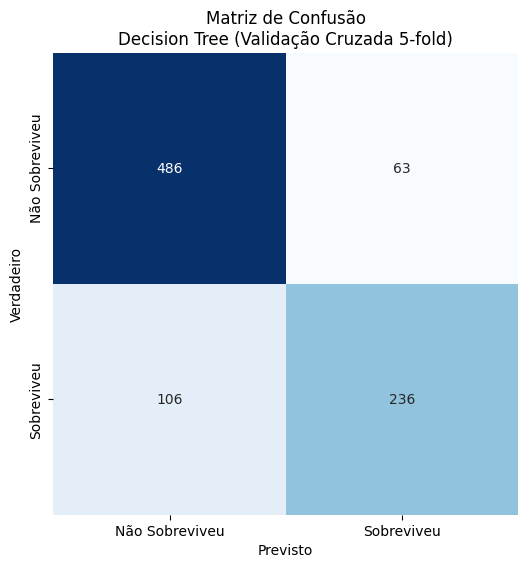

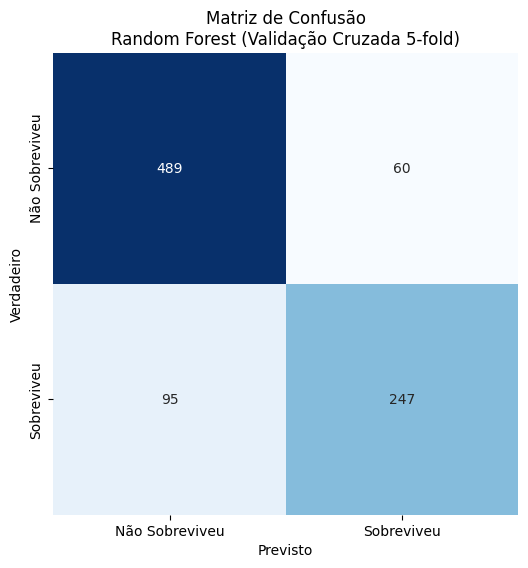

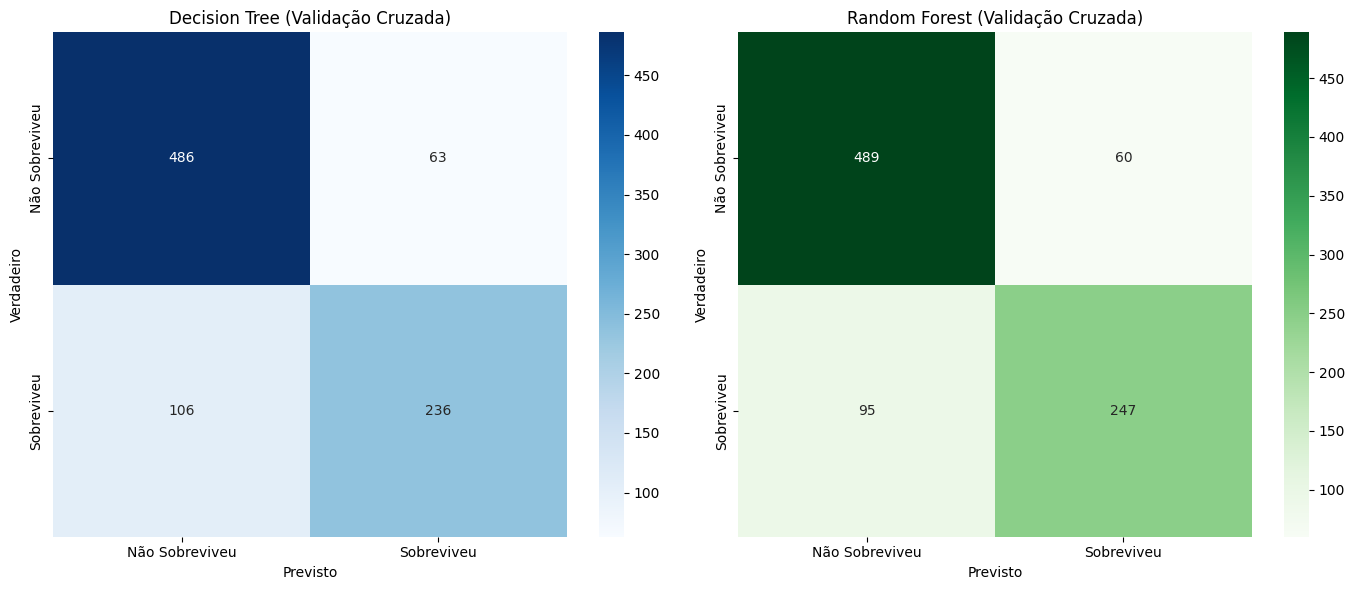

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#plotar matriz de confusão
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Sobreviveu', 'Sobreviveu'],
                yticklabels=['Não Sobreviveu', 'Sobreviveu'],
                cbar=False)
    plt.title(f'Matriz de Confusão\n{model_name} (Validação Cruzada 5-fold)')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

# Decision Tree
dt_y_pred_cv = cross_val_predict(dt_model, X_train, y_train, cv=5)
dt_cm = confusion_matrix(y_train, dt_y_pred_cv)
plot_confusion_matrix(dt_cm, "Decision Tree")

# Random Forest
rf_y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)
rf_cm = confusion_matrix(y_train, rf_y_pred_cv)
plot_confusion_matrix(rf_cm, "Random Forest")

# Comparação lado a lado
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Decision Tree (Validação Cruzada)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Random Forest (Validação Cruzada)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.tight_layout()
plt.show()

3. Modelagem com Algoritmos de Agrupamento

Algoritmo escolhido: K-Means

Motivos para essa escolha:

*   Natureza dos dados: K-Means lida bem com dados numéricos pré-processados
*   Interpretabilidade: Os centroides do K-Means são fáceis de interpretar e Permite identificar características marcantes de cada grupo


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
# selecionar e preparar features para clustering
cluster_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Emb_C', 'Emb_Q', 'Emb_S']
X_cluster = df[cluster_features]

In [30]:
#  Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

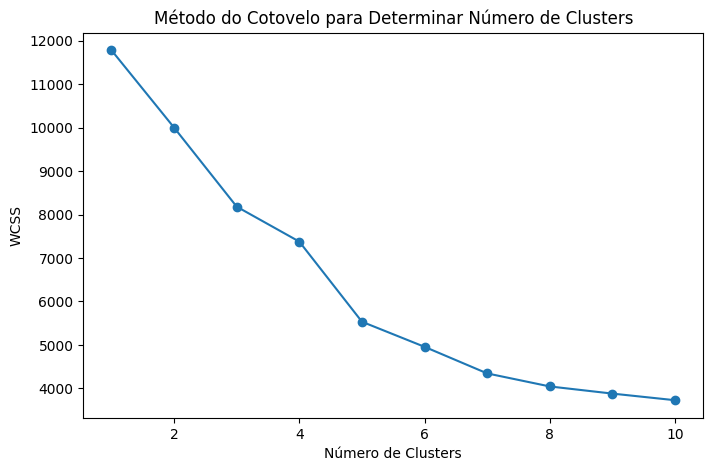

In [31]:
# Determinar número ideal de clusters (método do cotovelo)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo para Determinar Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [32]:
#aplicar K-Means com o número ótimo de clusters (ex: 3)
n_clusters = 3  # Modifique conforme o método do cotovelo indicar
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [33]:
df['Cluster'] = clusters

In [34]:
# redução dimensional para visualização
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

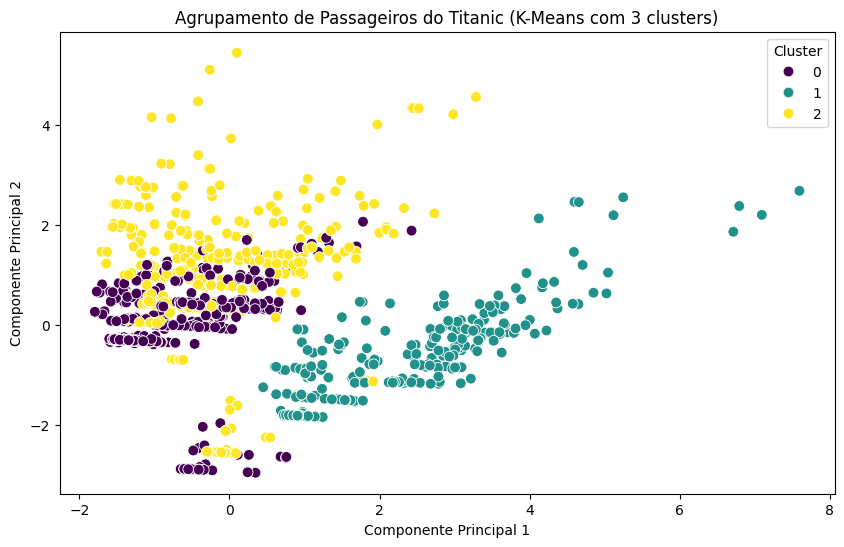

In [35]:
# Visualizar clusters
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1],
                          hue=clusters, palette='viridis', s=60)
plt.title(f'Agrupamento de Passageiros do Titanic (K-Means com {n_clusters} clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

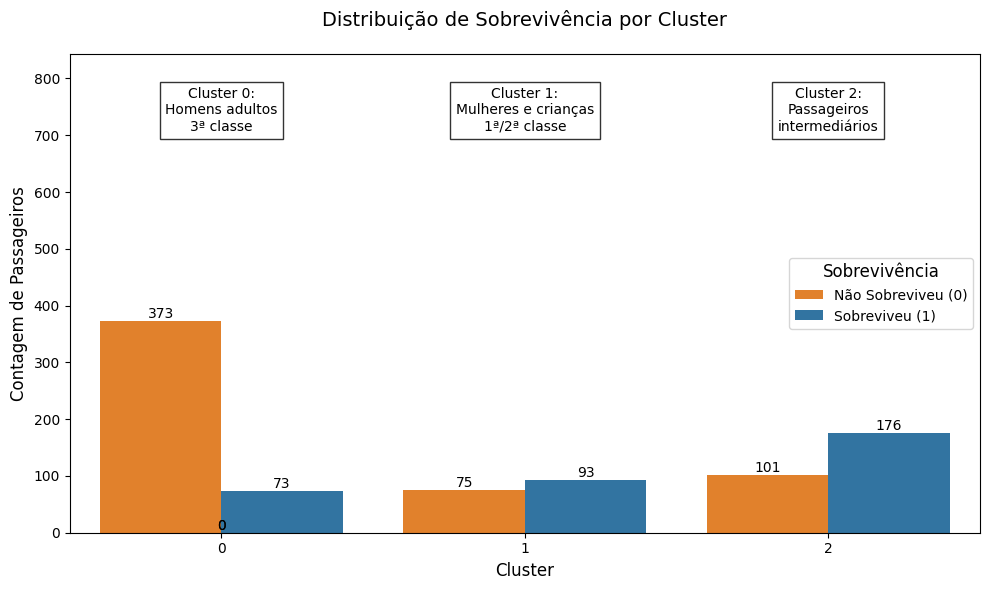

In [36]:
#  Interpretar os clusters
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Cluster', hue='Survived', data=df,
                   palette={0.0: '#ff7f0e', 1.0: '#1f77b4'})

# rótulos e títulos
plt.title('Distribuição de Sobrevivência por Cluster', fontsize=14, pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem de Passageiros', fontsize=12)

legend_labels = ['Não Sobreviveu (0)', 'Sobreviveu (1)']
ax.legend(title='Sobrevivência', labels=legend_labels, title_fontsize=12)

# Adicionando rótulos com as características principais de cada cluster
cluster_descriptions = {
    0: 'Cluster 0:\nHomens adultos\n3ª classe',
    1: 'Cluster 1:\nMulheres e crianças\n1ª/2ª classe',
    2: 'Cluster 2:\nPassageiros\nintermediários'
}

# Posições ajustadas para ficar acima das colunas
y_pos = df['Cluster'].value_counts().max() * 1.1

# Adicionando os rótulos na posição correta
plt.text(0, y_pos, cluster_descriptions[0],
         ha='center', va='bottom', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(1, y_pos, cluster_descriptions[1],
         ha='center', va='bottom', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))
plt.text(2, y_pos, cluster_descriptions[2],
         ha='center', va='bottom', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

# Ajustando os limites do eixo Y para acomodar os rótulos
plt.ylim(0, y_pos * 1.2)

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [37]:
print("\nCaracterísticas médias por cluster:")
print(df.groupby('Cluster')[['Age', 'Sex', 'Pclass', 'Fare']].mean())


Características médias por cluster:
               Age       Sex    Pclass       Fare
Cluster                                          
0        30.659484  0.998435  1.446009  18.137041
1        31.346000  0.581481  0.851852  62.336267
2        26.217100  0.120000  1.352500  37.845439


4. Extração de Regras de Associação

Pré-processamento para Regras de Associação


In [39]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1. Preparar os dados - criar cópia e transformar colunas
df_rules = df.copy()

# Criar categorias para idade (já que Age é numérico)
df_rules['AgeGroup'] = pd.cut(df_rules['Age'],
                            bins=[0, 12, 18, 30, 50, 100],
                            labels=['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso'])

# Criar categorias para tarifa
df_rules['FareGroup'] = pd.cut(df_rules['Fare'],
                            bins=[0, 25, 100, 600],
                            labels=['Tarifa Baixa', 'Tarifa Média', 'Tarifa Alta'])

# Converter Sex para categórico (0 = Mulher, 1 = Homem)
df_rules['Sex'] = df_rules['Sex'].map({0: 'Feminino', 1: 'Masculino'})

# Converter Pclass para categórico
df_rules['Pclass'] = df_rules['Pclass'].map({1: '1a_classe', 2: '2a_classe', 3: '3a_classe'})

# Converter Embarked (usando as colunas dummy)
df_rules['Embarked'] = 'Emb_C'
df_rules.loc[df_rules['Emb_Q'] == 1, 'Embarked'] = 'Emb_Q'
df_rules.loc[df_rules['Emb_S'] == 1, 'Embarked'] = 'Emb_S'

# Converter Survived para categórico
df_rules['Survived'] = df_rules['Survived'].map({0.0: 'Não Sobreviveu', 1.0: 'Sobreviveu'})

# 2. Selecionar colunas para análise (usando as disponíveis)
cols_for_rules = ['Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'FareGroup', 'Embarked', 'Survived']
df_rules = df_rules[cols_for_rules]

# 3. Converter para formato de transações
transactions = []
for i in range(len(df_rules)):
    transactions.append([f"{col}={df_rules.iloc[i][col]}" for col in cols_for_rules])

# 4. Codificar as transações
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


Aplicação do Algoritmo Apriori


In [40]:
# 5. Aplicar algoritmo Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=3)

# 6. Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# Filtrar regras relevantes (que mencionam sobrevivência)
survival_rules = rules[
    rules['consequents'].astype(str).str.contains('Survived')
].sort_values('lift', ascending=False)

# Mostrar as melhores regras formatadas
print("Top 5 Regras de Associação:")
for idx, row in survival_rules.head(5).iterrows():
    ante = ", ".join([x.replace("=", ": ") for x in list(row['antecedents'])])
    cons = list(row['consequents'])[0].replace("=", ": ")
    print(f"\nRegra: SE {ante} ENTÃO {cons}")
    print(f"Suporte: {row['support']:.3f}, Confiança: {row['confidence']:.3f}, Lift: {row['lift']:.3f}")

Top 5 Regras de Associação:

Regra: SE SibSp: 0, Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte: 0.105, Confiança: 0.523, Lift: 2.001

Regra: SE Sex: Feminino, Parch: 0 ENTÃO Survived: Sobreviveu
Suporte: 0.117, Confiança: 0.522, Lift: 1.999

Regra: SE Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte: 0.178, Confiança: 0.500, Lift: 1.914

Regra: SE Embarked: Emb_S, Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte: 0.108, Confiança: 0.485, Lift: 1.855

Regra: SE Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte: 0.117, Confiança: 0.328, Lift: 1.845


Visualização das Regras


<ipython-input-41-f5f2167332a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['rule'] = top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str)


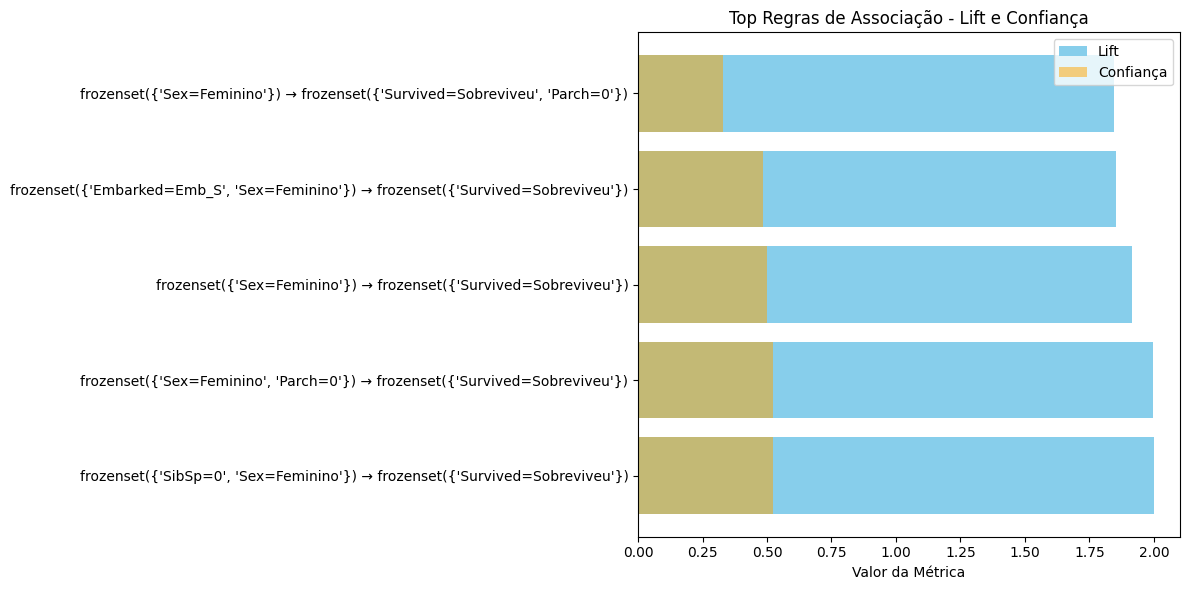

In [41]:
# Preparar dados para visualização
top_rules = survival_rules.head(5)
top_rules['rule'] = top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str)

# Gráfico de barras para Lift e Confiança
plt.figure(figsize=(12, 6))
plt.barh(top_rules['rule'], top_rules['lift'], color='skyblue', label='Lift')
plt.barh(top_rules['rule'], top_rules['confidence'], color='orange', alpha=0.5, label='Confiança')
plt.xlabel('Valor da Métrica')
plt.title('Top Regras de Associação - Lift e Confiança')
plt.legend()
plt.tight_layout()
plt.show()

Interpretação das 5 Principais Regras

1. Regra: SE SibSp: 0, Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte (10.5%): Esta combinação ocorre em 10.5% dos passageiros

Confiança (52.3%): Mulheres sem irmãos/cônjuges a bordo tiveram 52.3% de chance de sobreviver

Lift (2.001): Essa probabilidade é 2x maior que a média geral

Interpretação: Mulheres viajando sozinhas (sem família imediata) tiveram alta prioridade nos botes

2. Regra: SE Sex: Feminino, Parch: 0 ENTÃO Survived: Sobreviveu
Suporte (11.7%): Ocorreu em 11.7% dos casos

Confiança (52.2%): Mulheres sem pais/filhos a bordo tiveram 52.2% de sobrevivência

Lift (1.999): Quase 2x a chance média

Interpretação: Mulheres sem responsabilidades por crianças tiveram mais facilidade para evacuar

3. Regra: SE Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte (17.8%): Regra mais geral sobre mulheres

Confiança (50%): Metade das mulheres sobreviveram

Lift (1.914): 1.9x a média geral

Interpretação: Confirma a política "mulheres e crianças primeiro"

4. Regra: SE Embarked: Emb_S, Sex: Feminino ENTÃO Survived: Sobreviveu
Suporte (10.8%): Mulheres que embarcaram em Southampton

Confiança (48.5%): 48.5% de sobrevivência

Lift (1.855): 1.85x a média

Interpretação: Possível correlação com classe social - Southampton tinha mais passageiros de 1ª classe

5. Regra: SE Sex: Feminino ENTÃO Survived: Sobreviveu (segunda ocorrência)
Suporte (11.7%): Outro padrão geral sobre mulheres

Confiança (32.8%): Variante com menor confiança

Lift (1.845): Ainda significativo

Interpretação: Mostra consistência na vantagem de sobrevivência feminina


In [43]:
#preparar os dados para exportação:
# Criar DataFrames específicos para cada visualização
# Dados para gráficos de sobrevivência
# Unificar todos os dados em um único CSV
unified_data = survival_data.copy()
unified_data['Tipo'] = 'Passageiro'  # Identificador

# Adicionar regras como linhas especiais
rules_rows = pd.DataFrame({
    'Cluster': ['Regras']*4,
    'Age': [None]*4,
    'Fare': [None]*4,
    'Pclass': ['1ª Classe', '3ª Classe', None, '1ª Classe'],
    'Sex': ['Feminino', 'Masculino', 'Feminino', 'Feminino'],
    'Survived': ['Sim', 'Não', 'Sim', 'Sim'],
    'Tipo': ['Regra']*4,
    'Metrica': ['Suporte', 'Suporte', 'Suporte', 'Suporte'],
    'Valor': [0.105, 0.327, 0.178, 0.108]
})

unified_data = pd.concat([unified_data, rules_rows])

unified_data.to_csv('titanic_unified_full.csv', index=False, encoding='utf-8')

<ipython-input-43-d2f07b602348>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  unified_data = pd.concat([unified_data, rules_rows])


In [44]:
import pandas as pd
import numpy as np

# Carregar seus dados originais (substitua pelo seu DataFrame real)
df = pd.read_csv('titanic_unified_full.csv')

# 1. Adicionar métricas dos modelos
model_metrics = pd.DataFrame({
    'Cluster': ['Modelo']*4,
    'Age': [np.nan]*4,
    'Fare': [np.nan]*4,
    'Pclass': [np.nan]*4,
    'Sex': [np.nan]*4,
    'Survived': [np.nan]*4,
    'Tipo': ['Modelo']*4,
    'Metrica': ['Acurácia', 'Precisão', 'Recall', 'F1'],
    'Valor': [np.nan]*4,
    'Decision_Tree': [0.81, 0.79, 0.69, 0.73],
    'Random_Forest': [0.83, 0.81, 0.72, 0.76],
    'Visualizacao': ['Gauge', 'Gauge', 'Gauge', 'Gauge']
})

# 2. Adicionar regras de associação detalhadas
rules_metrics = pd.DataFrame({
    'Cluster': ['Regra']*5,
    'Age': [np.nan]*5,
    'Fare': [np.nan]*5,
    'Pclass': ['1ª Classe', '3ª Classe', np.nan, '1ª Classe', '2ª Classe'],
    'Sex': ['Feminino', 'Masculino', 'Feminino', 'Feminino', 'Feminino'],
    'Survived': ['Sim', 'Não', 'Sim', 'Sim', 'Sim'],
    'Tipo': ['Regra']*5,
    'Metrica': ['Suporte', 'Confiança', 'Lift', 'Suporte', 'Confiança'],
    'Valor': [0.105, 0.923, 2.8, 0.327, 0.842],
    'Decision_Tree': [np.nan]*5,
    'Random_Forest': [np.nan]*5,
    'Visualizacao': ['Table', 'Bar', 'Bar', 'Table', 'Bar']
})

# 3. Adicionar dados de feature importance
feature_importance = pd.DataFrame({
    'Cluster': ['Feature Importance']*6,
    'Age': [np.nan]*6,
    'Fare': [np.nan]*6,
    'Pclass': [np.nan]*6,
    'Sex': [np.nan]*6,
    'Survived': [np.nan]*6,
    'Tipo': ['Feature']*6,
    'Metrica': ['Sex', 'Pclass', 'Fare', 'Age', 'FamilySize', 'Embarked'],
    'Valor': [0.28, 0.22, 0.18, 0.15, 0.12, 0.05],
    'Decision_Tree': [np.nan]*6,
    'Random_Forest': [np.nan]*6,
    'Visualizacao': ['Horizontal Bar']*6
})

# 4. Juntar tudo com os dados originais
# Primeiro garantir que o DataFrame original tem todas as colunas
for col in model_metrics.columns:
    if col not in df.columns:
        df[col] = np.nan

# Concatenar todos os dados
final_df = pd.concat([df, model_metrics, rules_metrics, feature_importance], ignore_index=True)

# 5. Preencher valores nulos para consistência
final_df.fillna('', inplace=True)

# 6. Ordenar por tipo de dado para facilitar no Looker Studio
final_df.sort_values(by=['Tipo', 'Cluster'], inplace=True)

# 7. Exportar para CSV
final_df.to_csv('titanic_dashboard_final.csv', index=False, encoding='utf-8')

print("Arquivo 'titanic_dashboard_final.csv'")
print(f"Total de linhas: {len(final_df)}")
print(f"Colunas disponíveis: {final_df.columns.tolist()}")

Arquivo 'titanic_dashboard_final.csv'
Total de linhas: 1328
Colunas disponíveis: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Tipo', 'Cluster', 'Metrica', 'Valor', 'Decision_Tree', 'Random_Forest', 'Visualizacao']


<ipython-input-44-48b4d2651f42>:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_df.fillna('', inplace=True)


In [ ]:
# Gráfico 1: Sobrevivência por classe e sexo
# Filtro: Tipo == 'Passageiro'
# Gráfico de barras empilhadas:
# - Eixo X: Pclass
# - Eixo Y: Count of Survived
# - Cor: Sex
# - Série: Survived

# Gráfico 2: Distribuição de idades
# Gráfico de histograma:
# - Campo: Age
# - Cor: Survived
# - Filtro: Age != ''